# 1 Introducción

El siguiente ejemplo aplica 2 operaciones puntuales a una imagen.
Las operaciones puntuales son transformaciones de uno a uno, es decir el nuevo valor de un pixel 'q' en la posición (i, j) esta en función de un pixel 'p' de otra imagen pero en la misma posición, es decir, (i, j).
q(i,j) = F(p(i,j)) 
En el ejemplo se transforma una imagen en su inversa/negativa, o una imagen en escala de grises, en una imagen binaria.

**Operador Inverso o Negativo:**

$q = 255 - p$

**Operador Intervalo de Umbral Binario:**

$q = 255$ para p <= rango_inferior o p >= rango_superior

$q = 0$ para rango_inferior < p < rango_superior


El objetivo es calcular el tiempo que toma esta transformacion en forma secuencial para observar la diferencia de tiempo con su contraparte paralela con GPU-CUDA.

---
# 2 Armado del ambiente
Toma la dirección web de 1 imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno colab.

In [3]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de las imagen:
url_imagen = "https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/imagen1.jpg?raw=true" #@param {type:"string"}
#@markdown ---

!wget {url_imagen} -O imagen.jpg

--2020-12-01 01:56:23--  https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/imagen1.jpg?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/imagen1.jpg [following]
--2020-12-01 01:56:23--  https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/imagen1.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/imagen1.jpg [following]
--2020-12-01 01:56:23--  https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/imagen1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

# 3 Desarrollo
Ejecución de "Operador Inverso o Negativo" o "Operador Intervalo de Umbral Binario"

Imagen 1: imagen.jpg -RGB- [199, 149]
Tiempo imagen: 66.267 ms
Tiempo total: 82.546 ms


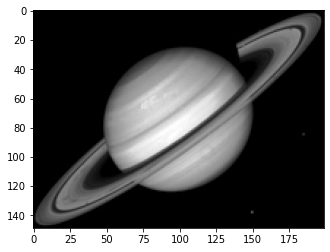

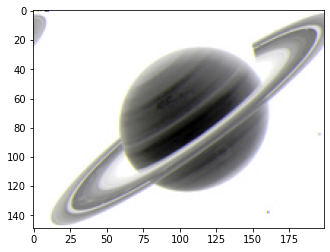

In [6]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique el tipo de transformacion. imagen binaria = true; negativa = falso
imagen_binaria = False #@param {type:"boolean"}
#@markdown ---

try:
  from datetime import datetime
  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  # Empiezo a contar el tiempo de procesamiento total
  tiempo_total = datetime.now()
  # Cargo la imagen guardada en el "Armado del ambiente"
  img_nombre = 'imagen.jpg'
  image = Image.open(img_nombre) 

  # Obtengo dimensiones de la imagen
  img_ancho, img_alto = image.size

  # Inicializo los valores para la transformacion binaria
  valor_inferior = 50
  valor_superior = 180
  
  # Muestro los atributos de la imagen
  print("Imagen 1: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )
  if valor_inferior < 0 or valor_superior > 255:
    raise Exception("El rango de valores para la imagen debe ser desde 0 hasta 255")
  
  # Convierto la imagen comprimida en JPEG/PNG a array
  img1 = numpy.asarray(image)

  # Genero el array resultado (3 pixeles usa RGB * (el tamaño del array))
  img_result = numpy.empty_like(img1)
  
  # Muestro como se ve la imagen antes del filtro.
  plt.figure()
  imgplot = plt.imshow(img1)

  # Empiezo a contar el tiempo de procesamiento de la imagen
  tiempo_img = datetime.now()
  
  # Aplico el filtro a la imagen
  if imagen_binaria:
    for y in range(0, img_ancho):
      for x in range(0, img_alto):
        if img1[x][y][0] > valor_inferior and img1[x][y][0] < valor_superior:
          img_result[x][y] = 0
        else:
          img_result[x][y] = 255
  else:
    for y in range(0, img_ancho):
      for x in range(0, img_alto):
          img_result[x][y] = 255 - img_result[x][y]

  # Calculo el tiempo de procesamiento de la imagen
  tiempo_img = datetime.now() - tiempo_img

  # Calculo el tiempo total de procesamiento
  tiempo_total = datetime.now() - tiempo_total

  # Muestro la imagen con el filtro aplicado
  plt.figure()
  imgplot = plt.imshow(img_result)

  # Muestro los valores calculados
  print("Tiempo imagen:", tiempo_en_ms(tiempo_img), "ms")
  print("Tiempo total:", tiempo_en_ms(tiempo_total), "ms")
except Exception as excep:
  print("Error: ", excep)

---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Funciòn | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la direccion URL de las imagen (jpg) a procesar.
CPU      |  @param                | Lectura del tipo de transformacion a aplicar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  tiempo_en_ms          | Define una funcion para obtener el tiempo en milisegundos a partir de una fecha.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  print()               | Informa los atributos de la imagen.
CPU      |  if-except             | Genera un error si los parametros no estan entre 0 y 255.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  print()               | Informa el atributo de la imagen.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  for...for..           | Aplica el filtro a la imagen
CPU      |  plt.imshow            | Muestra la imagen resultado.
CPU      |  print()          | Muestra el tiempo total y el tiempo dedicado a las imagenes


---
# 5 Conclusiones
### Breve repaso
En este ejercicio se aplican 2 operaciones puntuales a una imagen.
Operador Inverso o Negativo: transforma una imagen a sus colores inversos.
Operador Intervalo de Umbral Binario: transforma una imagen en escala de grises a una imagen binaria, donde los colores (blanco y negro) dependen de un rango determinado.

### Lecciones aprendidas
Como conclusion podemos observar que al realizar la transformacion de la imagen en forma secuencial, el tiempo de ejecucion es proporcional al tamaño de cualquier la imagen. Esto significa que la mayor parte del tiempo es utilizado por la transformacion, con lo que a medida que aumente el tamaño de la imagen a transformar, irá aumentando el tiempo que necesita para transformarla.

### Sugerencias para continuar
El ejercicio se podria continuar agregando mas operaciones puntuales tales como "Operador Umbral", "Operador Intervalo de Umbral Binario Invertido", "Operador Umbral de la Escala de Grises", etc.

---
# 6 Bibliografía


[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[4] Operaciones puntuales para imagenes: [Web](https://sites.google.com/site/lemared/operaciones-puntuales-sobre-imagenes)